# Arsenal Social Sentiment Analysis
## Forecasting User Sentiment between games. 
by *Ben N. Bellman* 
<br> Prepared as Springboard Capstone Project
<br> *4/13/2022*

<img src="images/who-s-denilo-SuBb_SiEEM8-unsplash.jpg" style="width:800px;height:400px"/>

### WARNING: 
*Although the usernames have been anonymized as to protect the privacy of the users in this analysis, the tweets are still in raw format and may contain inappropriate / sensitive content. Viewer discretion is advised*

## Outline

## Data Mapping: 

One of the important things to know for the analysis is the schedule of the games.
The objective in the social sentiment analysis is to predict whether or not a specific tweet is likely to come  

In [1]:
%load_ext watermark
%watermark 

Last updated: 2022-04-28T15:58:14.524762-07:00

Python implementation: CPython
Python version       : 3.9.12
IPython version      : 8.0.1

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [2]:
## We start by importing the packages we will use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot 

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor, GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb 

from sklearn.metrics import precision_recall_curve, roc_curve, auc, confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import mean_squared_error as mse, r2_score, mean_absolute_error as mae, f1_score, fbeta_score 
from sklearn.metrics import plot_confusion_matrix,classification_report, balanced_accuracy_score, recall_score
from sklearn.metrics import roc_auc_score, log_loss,matthews_corrcoef, ConfusionMatrixDisplay

from io import StringIO 
from IPython.display import Image,HTML 
import pydotplus
import graphviz
import shap


## Import Local Functions

from functions import (preview_data,
                       get_missing_counts,
                       get_value_counts,
                       get_unique_column_count,
                       get_datetimes,
                       drop_null_values)             

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth',-1)
%matplotlib inline

In [3]:
## Load the Data
df = pd.read_csv('All_Tweets_Arsenal.csv')

## I. Data Exploration and Data Wrangling

In [4]:
## Start by previewing the data:
preview_data(df)

First Five Rows of Data: 



,Date,Username,Tweet,TweetLikes,TweetReplies,RetweetCount,Positive
0,2022-04-13 13:35:44+00:00,Anonymous186164,"@dustsorcerer 1. Combat Warriors\n2. Black Magic II: Phantom's Caustum\n3. Those Who Remain\n4. Decaying Winter\n5. Lore Game\n\nHonorable mentions: Westbound, Vesteria, Dawn of Aurora, AUT, Phantom Forces, Arsenal and PWNED: Aeternae Memori",0,0,0,False
1,2022-04-13 13:35:43+00:00,Anonymous90859,@El_Mozquetero So you want arsenal to be losing matches to achieve what you want for arsenal? https://t.co/EMNqBhjyu5,0,0,0,False
2,2022-04-13 13:35:42+00:00,Anonymous209962,"Letras que dibujan sonrisas, que llenan el alma de colores y alegrÃ­a... \n\n""En la poesÃ­a las letras son balas sin daÃ±o, \nel alma, el paredÃ³n a donde van a dar las frases, \nese amoroso arsenal que atina tambiÃ©n en el corazÃ³n"".\nDe @jpenalver",0,0,0,False
3,2022-04-13 13:35:42+00:00,Anonymous334676,"@arse_talk @El_Mozquetero I don't think an Arsenal fan would go about it this way, even if they did want us to change manager, either that or they're just incredibly childish.",0,0,0,False
4,2022-04-13 13:35:36+00:00,Anonymous272092,"@bubblecheebutt Je vais pas relever le connard. En tt cas, depuis Quai de l'Arsenal et jusqu'Ã Bir Hakeim, en passant par la voie Georges Pompidou, tu as seulement 2 feux (Ã Concorde), puis 2 feux Ã Bir Hakeim si tu passes par les quais en bas.\nPas besoin de les griller.",0,0,0,False



 Shape: 

(957611, 7)

 Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957611 entries, 0 to 957610
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Date          957611 non-null  object
 1   Username      957611 non-null  object
 2   Tweet         957611 non-null  object
 3   TweetLikes    957611 non-null  int64 
 4   TweetReplies  957611 non-null  int64 
 5   RetweetCount  957611 non-null  int64 
 6   Positive      957611 non-null  bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 44.7+ MB
None


In [5]:
## Get the missing values
get_missing_counts(df)

Missing Value Percentages by Column: 

Date -----> 0 -----> 0.0%
Username -----> 0 -----> 0.0%
Tweet -----> 0 -----> 0.0%
TweetLikes -----> 0 -----> 0.0%
TweetReplies -----> 0 -----> 0.0%
RetweetCount -----> 0 -----> 0.0%
Positive -----> 0 -----> 0.0%


In [6]:
## Drops the missing Usernames. 
drop_null_values(df,['Username'])

In [7]:
## Converts date to datetime. 

# Fix this --> get_datetimes(df,'Date',['Date'])
df['Date'] = df['Date'].apply(pd.to_datetime)
print('Date Ranges: {} -- {}'.format(df['Date'].min(), df['Date'].max()))

Date Ranges: 2022-02-09 00:00:00+00:00 -- 2022-04-13 13:35:44+00:00


Ok, so the date ranges are between 03-29-22 and 4-13-22, so the 500,000 tweets about Arsenal are all in a two week period. 
<br> In that two week period, Arsenal were coming out of the international break and played two games which they both lost: 
- **Crystal Palace** -- *04-04-22*  
- **Brighton & Holvion** -- *04-09-22* 

In [8]:
## Get unique values in each column: 
get_unique_column_count(df)

Unique values in each object column: 

Username: 366682
Tweet: 938269


Looking at this, we have a little more than twice as many tweets as users. 

In [9]:
## Get Values
get_value_counts(df)

Unique values in each object column: 

Username
Anonymous37312     1858
Anonymous315818    922 
Anonymous37137     861 
Anonymous8076      792 
Anonymous248467    705 
                  ...  
Anonymous365399    1   
Anonymous158321    1   
Anonymous214267    1   
Anonymous53689     1   
Anonymous295483    1   
Name: Username, Length: 366682, dtype: int64{}


Tweet
@premierleague Arsenal                                                                                                               523
@premierleague @Arsenal                                                                                                              306
@eToro @Arsenal Per Mertesacker                                                                                                      185
@CaminoTV Arsenal                                                                                                                    151
Arsenal                                                                              

In [10]:
## We can look at the distribution of our tweets.
df.describe()

,TweetLikes,TweetReplies,RetweetCount
count,957611.000000,957611.000000,957611.000000
mean,17.531090,0.931855,1.511419
std,381.401238,15.008557,42.848053
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000
max,81382.000000,4486.000000,15715.000000


## II. Exploratory Data Analysis

We can look at the distribution of tweets.

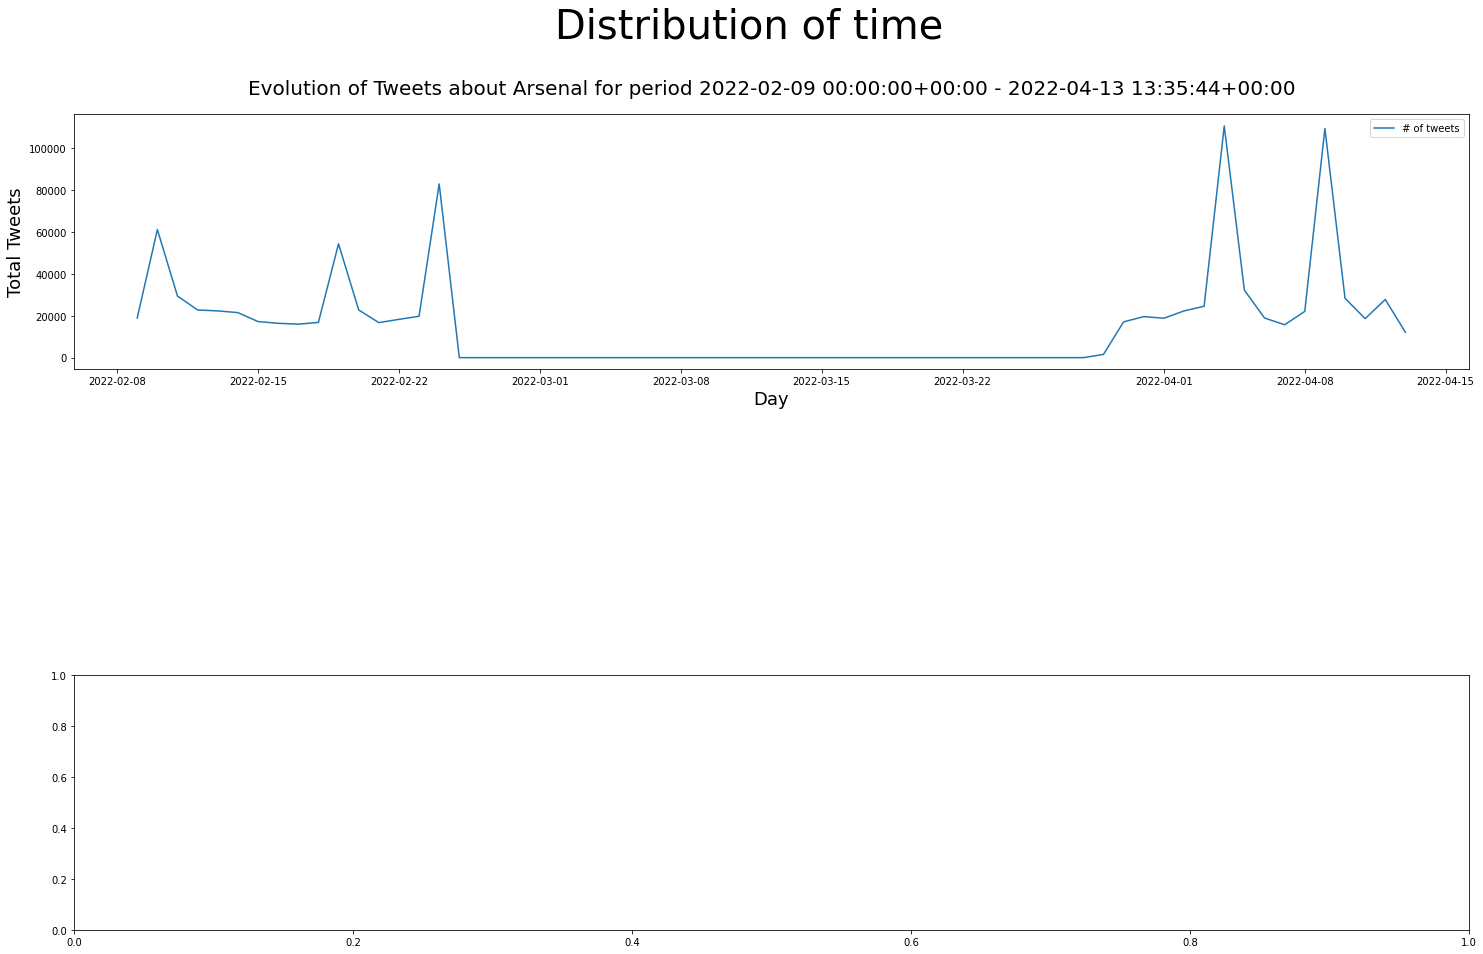

<Figure size 1440x576 with 0 Axes>

In [11]:
## We create a time-series Dataframe and resample by day.
time_df = df[['Date','Username']]
time_df['Date'] = pd.to_datetime(time_df['Date'])
time_df['Tweet'] = 1
time_df.drop(columns='Username', inplace=True)
time_df.set_index('Date', inplace = True)
time_df = time_df.resample('d').sum()
time_df

## We plot the number of tweets during the time period.
fig, axes = plt.subplots(2, figsize=(25,15))
fig.suptitle('Distribution of time', fontsize =40)
fig.subplots_adjust(hspace=1.2)
plt.figure(figsize=(20,8))

axes[0].plot(time_df, label = '# of tweets')
axes[0].set_title('Evolution of Tweets about Arsenal for period {} - {}'.format(df['Date'].min(), df['Date'].max()), fontsize = 20, pad =20)
axes[0].set_xlabel('Day', fontsize = 18)
axes[0].set_ylabel('Total Tweets', fontsize = 18)
axes[0].legend(loc='best')
plt.show()

Let's look at a preview of the 10 most liked tweets. 

In [12]:
## Let's look at the 10 most popular tweets in the dataset.
df[['Tweet','Date','TweetLikes','Username']].sort_values('TweetLikes', ascending =False).head(10)

,Tweet,Date,TweetLikes,Username
667229,Nice kick about with the boys. âš½ï¸@Arsenal ðŸ˜˜,2022-02-19 20:26:45+00:00,81382,Anonymous197295
534154,NEVER. GIVE. UP ðŸ‘Š https://t.co/pVZCCyrN4J,2022-02-24 21:41:15+00:00,75970,Anonymous36754
530283,"HOW DOES THAT FEEL, GUNNERS? ðŸ˜\n\nðŸ”´ 2-1 ðŸŸ¡ (FT)\n\n#ARSWOL",2022-02-24 21:43:02+00:00,68917,Anonymous36754
523493,ARSENAL MAKE ME WET OMG,2022-02-24 21:47:53+00:00,65523,Anonymous195118
52144,Aubameyang has almost scored as many goals as Arsenal since leaving the club ðŸ˜¯ https://t.co/6eq6PsOg99,2022-04-11 11:00:01+00:00,63893,Anonymous111848
415517,"Rape is a weapon of war. Though we donâ€™t yet know the full extent of its use in #Ukraine itâ€™s already clear it was part of ðŸ‡·ðŸ‡º arsenal. Women raped in front of their kids, girls in front of their families, as a deliberate act of subjugation. Rape is a war crime.",2022-04-03 06:13:49+00:00,55029,Anonymous225877
457148,âœ… Six goals\nâœ… Three wins\n\n@M8Arteta has been named the @PremierLeague Manager of the Month! ðŸ¤©,2022-04-01 11:00:01+00:00,51175,Anonymous36754
24399,"If you ever feel stupid, just remember that Arsenal sacked Emery for Arteta.",2022-04-12 20:51:51+00:00,50064,Anonymous341432
530760,ARSENAL WIN IT IN THE 95TH MINUTE https://t.co/8N3hW0Qegl,2022-02-24 21:42:47+00:00,45578,Anonymous58780
617139,"ðŸ½ Chip Inn Fish Bar \n\nðŸŸ Home to the finest catches, on the other side of Holloway Rd.\n\nðŸ§¤ Isn't that right, @AaronRamsdale98?\n\n#ArsenalSupportingSupporters https://t.co/L23N8ckbYj",2022-02-22 10:00:00+00:00,43969,Anonymous36754


In [13]:
!python --version

Python 3.9.12


## III. Preprocessing and Modeling

In [14]:
df.Tweet

0         @dustsorcerer 1. Combat Warriors\n2. Black Magic II: Phantom's Caustum\n3. Those Who Remain\n4. Decaying Winter\n5. Lore Game\n\nHonorable mentions: Westbound, Vesteria, Dawn of Aurora, AUT, Phantom Forces, Arsenal and PWNED: Aeternae Memori                                  
1         @El_Mozquetero So you want arsenal to be losing matches to achieve what you want for arsenal? https://t.co/EMNqBhjyu5                                                                                                                                                              
2         Letras que dibujan sonrisas, que llenan el alma de colores y alegrÃ­a... \n\n"En la poesÃ­a las letras son balas sin daÃ±o, \nel alma, el paredÃ³n a donde van a dar las frases, \nese amoroso arsenal que atina tambiÃ©n en el corazÃ³n".\nDe @jpenalver                          
3         @arse_talk @El_Mozquetero I don't think an Arsenal fan would go about it this way, even if they did want us to change manager, eithe

## IV. Conclusions